## scikit-learn básico

### Carregando datasets básicos

In [18]:
from sklearn.datasets import load_iris


dataset = load_iris()
for key, value in dataset.items():
    print key, ':'
    print value

target_names :
['setosa' 'versicolor' 'virginica']
data :
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]

### Dividindo entre treino e teste

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size=0.25)

print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(112, 4) (112,) (38, 4) (38,)


### Usando um classificador

In [20]:
# treinando
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# testando
predictions = clf.predict(X_test)  # apenas números
predictions_names = [dataset['target_names'][x] for x in predictions]  # nomes

from sklearn.metrics import accuracy_score

print 'accuracy:', accuracy_score(y_test, predictions)

accuracy: 0.973684210526


### Projetando as predições (em 2D)

O dataset iris tem 4 dimensões (altura e largura da sépala, altura e largura da pétala). Podemos utilizar algoritmos de seleção de atributos para obter uma projeção mais fidedigna, em um espaço de dados transformado (i.e. PCA ou t-sne). Mas, por simplicidade, aqui projetaremos apenas os atributos altura e largura da pétala.

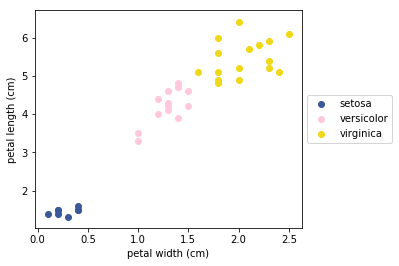

In [21]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)    

colors = ['#3b5998', '#ffc8dc', '#f0d817']

for i, name in enumerate(dataset['target_names']):
    where = np.flatnonzero(predictions == i)
    plt.scatter(X_test[where, -1], X_test[where, -2], c=colors[i], label=name)
    
        
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel(dataset['feature_names'][-1])
plt.ylabel(dataset['feature_names'][-2])

plt.show()

### Projetando a árvore de decisão
Árvores de decisão são modelos _white box_: o processo classificatório é conhecido a todo instante. Como utilizamos uma árvore para fazer a predição do dataset iris, somos capazes de mostrar sua estrutura:

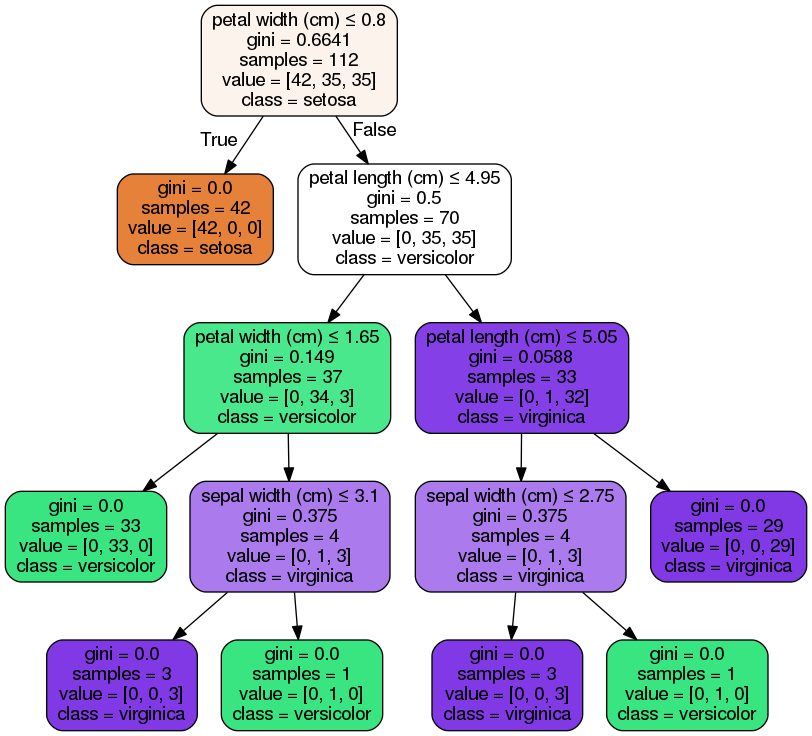

In [22]:
import pydotplus
from IPython.display import Image 

dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=dataset.feature_names,  
    class_names=dataset.target_names,  
    filled=True, rounded=True,  
    special_characters=True
)  

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())